<a href="https://colab.research.google.com/github/lingliao/remap_tf-main_Taylor/blob/main/tf_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

library(tidyverse)
library(zoo)

In [ ]:
unzip("/content/Taylor.zip")

In [ ]:
import = function(path){
  counts = read.table(path, sep = " ")
  colnames(counts) = c("position", "count")
  counts = as_tibble(counts)
  return(counts)
}

In [ ]:
names = list.files("/content/Taylor", pattern = "*B8")

In [ ]:
names

[1] "lib262_HOXB8_count_position" "lib486_HOXB8_count_position"

In [ ]:
files = list.files("/content/Taylor", pattern = "B8", full.names = T)

In [ ]:
names(files) = names

hox = lapply(files, import)

hox_all = hox %>% bind_rows(.id = "list_name")

In [ ]:
hox_all = hox_all %>% mutate(pos = position -3501) %>% mutate(library = substr(list_name, 1, 6))

In [ ]:
hox_all

In [ ]:
df <- hox_all[order(hox_all$pos,decreasing=FALSE),]

In [ ]:
dim(df)

[1] 14004     5

In [ ]:
a <- split(x = df, f = df$library)
lib486 <- a$lib486
lib262 <- a$lib262

In [ ]:
dim(l)

[1] 6802    1

In [ ]:
lib486_zi <- rollmean(lib486$count, k = 201,align = "center", fill = NA)

lib486_zi <- data.frame(lib486_zi)

In [ ]:
lib486_zi

In [ ]:

lib486_mu <- rollmean(lib486$count, k = 501,align = "center", fill = NA)
lib486_mu <- data.frame(lib486_mu)

lib486_mu$seq_num <- seq.int(nrow(lib486_mu))
lib486_zi$seq_num <- seq.int(nrow(lib486_zi))

In [ ]:
dim(lib486_mu)

[1] 7002    2

In [ ]:
head(lib486_zi)

,lib486_zi,seq_num
,<dbl>,<int>
1,NA,1
2,NA,2
3,NA,3
4,NA,4
5,NA,5
6,NA,6


In [ ]:
colnames(lib486_mu) = c( "average count","relative position")
colnames(lib486_zi) = c( "average count","relative position")

In [ ]:
lib486_mu[3501,]

,average count,relative position
,<dbl>,<int>
3501,380.0439,3501


In [ ]:
lib486_mu = lib486_mu %>% mutate(position = lib486_mu[,2] -3501)
lib486_zi = lib486_zi %>% mutate(position = lib486_zi[,2] -3501)

In [ ]:
head(lib486_mu)

,average count,relative position,position
,<dbl>,<int>,<dbl>
1,NA,1,-3500
2,NA,2,-3499
3,NA,3,-3498
4,NA,4,-3497
5,NA,5,-3496
6,NA,6,-3495


In [ ]:
head(lib486_zi)

,average count,relative position,position
,<dbl>,<int>,<dbl>
1,NA,1,-3500
2,NA,2,-3499
3,NA,3,-3498
4,NA,4,-3497
5,NA,5,-3496
6,NA,6,-3495


In [ ]:
lib486_mu[251,]

,average count,relative position,position
,<dbl>,<int>,<dbl>
251,376.7944,251,-3250


In [ ]:
lib486_mu[5501,]

,average count,relative position,position
,<dbl>,<int>,<dbl>
5501,371.2894,5501,2000


In [ ]:
dim(lib486_mu)

[1] 7002    3

In [ ]:
lib486_fenmu_1 <- data.frame(
  x = numeric(0)
)

for (i in 251:1251) {
  # access the ith row of the dataframe
  row_i <- lib486_mu[i, ]
  row <- row_i$"average count"

  lib486_fenmu_1 <- rbind(lib486_fenmu_1, c(row))
}

lib486_fenmu_2 <- data.frame(
  x = numeric(0)
)

for (i in 251:1251) {
  # access the ith row of the dataframe
  row_j <- lib486_mu[i+5500,]
  row <- row_j$"average count"

  lib486_fenmu_2 <- rbind(lib486_fenmu_2, c(row))
}

In [ ]:
dim(lib486_fenmu_2)

[1] 1001    1

In [ ]:
colnames(lib486_fenmu_1) = c( "average count_1")
colnames(lib486_fenmu_2) = c( "average count_2")

In [ ]:
dim(lib486_fenmu_1)

[1] 1001    1

In [ ]:
head(lib486_fenmu_1)

,average count_1
,<dbl>
1,376.7944
2,376.7944
3,376.7804
4,376.7605
5,376.7445
6,376.7365


In [ ]:
dim(lib486_zi)

[1] 7002    3

In [ ]:
head(lib486_zi)

,average count,relative position,position
,<dbl>,<int>,<dbl>
1,NA,1,-3500
2,NA,2,-3499
3,NA,3,-3498
4,NA,4,-3497
5,NA,5,-3496
6,NA,6,-3495


In [ ]:
lib486_zi[4001,]

,average count,relative position,position
,<dbl>,<int>,<dbl>
4001,353.6766,4001,500


In [ ]:
lib486_fenzi <- data.frame(
  x = numeric(0)
)

for (i in 3001:4001) {
  # access the ith row of the dataframe
  row_i <- lib486_zi[i, ]$"average count"

  lib486_fenzi <- rbind(lib486_fenzi, c(row_i))
}



In [ ]:
colnames(lib486_fenzi) = c( "average count")
lib486_fenzi

In [ ]:
dim(lib486_fenzi)

[1] 1001    1

In [ ]:
head(lib486_fenmu_1)

,average count_1
,<dbl>
1,386.9830
2,386.9990
3,387.0080
4,387.0120
5,387.0210
6,387.0399


In [ ]:
dim(lib486_fenzi)

[1] 1001    1

In [ ]:
lib486_fenmu_1

In [ ]:
lib486_total <- cbind(lib486_fenzi,lib486_fenmu_1$"average count_1",lib486_fenmu_2$"average count_2" )

In [ ]:
colnames(lib486_total) <- c("Numerator", "Denominator_1","Denominator_2")

In [ ]:
head(lib486_total)

,Numerator,Denominator_1,Denominator_2
,<dbl>,<dbl>,<dbl>
1,379.3980,376.7944,397.1717
2,379.4030,376.7944,397.2036
3,379.3632,376.7804,397.2355
4,379.3284,376.7605,397.2635
5,379.2886,376.7445,397.2974
6,379.2637,376.7365,397.3433


In [ ]:
lib486_total = lib486_total %>% mutate(Relative_fraction_1 = Numerator/Denominator_1)

In [ ]:
lib486_total = lib486_total %>% mutate(Relative_fraction_2 = Numerator/Denominator_2)

In [ ]:
head(lib486_total)

,Numerator,Denominator_1,Denominator_2,Relative_fraction_1,Relative_fraction_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,379.3980,376.7944,397.1717,1.006910,0.9552495
2,379.4030,376.7944,397.2036,1.006923,0.9551852
3,379.3632,376.7804,397.2355,1.006855,0.9550082
4,379.3284,376.7605,397.2635,1.006816,0.9548534
5,379.2886,376.7445,397.2974,1.006753,0.9546716
6,379.2637,376.7365,397.3433,1.006708,0.9544987


In [ ]:
lib486_total = lib486_total %>% mutate(Relative_fraction = (Relative_fraction_1 + Relative_fraction_2)/2)

In [ ]:
head(lib486_total)

,Numerator,Denominator_1,Denominator_2,Relative_fraction_1,Relative_fraction_2,Relative_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,379.3980,376.7944,397.1717,1.006910,0.9552495,0.9810797
2,379.4030,376.7944,397.2036,1.006923,0.9551852,0.9810541
3,379.3632,376.7804,397.2355,1.006855,0.9550082,0.9809315
4,379.3284,376.7605,397.2635,1.006816,0.9548534,0.9808345
5,379.2886,376.7445,397.2974,1.006753,0.9546716,0.9807122
6,379.2637,376.7365,397.3433,1.006708,0.9544987,0.9806034


In [ ]:
seq_num <- seq(from = -500, to = 500)
relative_position <- data.frame(Sequential_Numbers = seq_num)
#test <- cbind(relative_position,lib486_total$"Relative_fraction" )

In [ ]:
standardized_data1

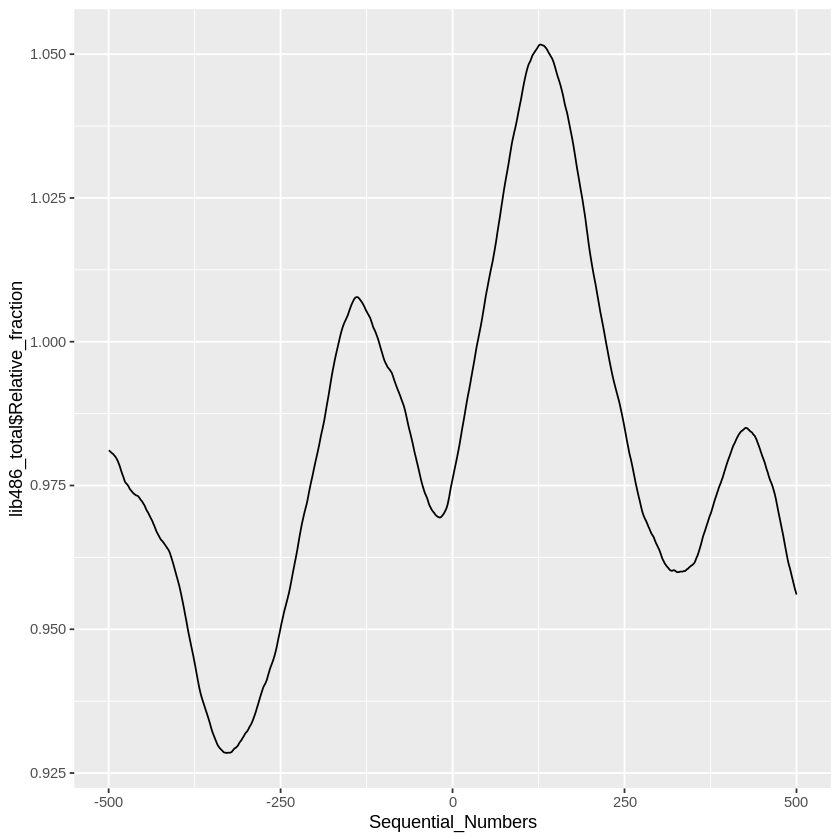

In [ ]:
ggplot(test, aes(x = Sequential_Numbers, y = lib486_total$Relative_fraction)) + 
  geom_line()  

In [ ]:
lib262_zi <- rollmean(lib262$count, k = 201,align = "center", fill = NA)

lib262_zi <- data.frame(lib262_zi)


lib262_mu <- rollmean(lib262$count, k = 501,align = "center", fill = NA)
lib262_mu <- data.frame(lib262_mu)

lib262_mu$seq_num <- seq.int(nrow(lib262_mu))
lib262_zi$seq_num <- seq.int(nrow(lib262_zi))

colnames(lib262_mu) = c( "average count","relative position")
colnames(lib262_zi) = c( "average count","relative position")

lib262_mu = lib262_mu %>% mutate(position = lib262_mu[,2] -3501)
lib262_zi = lib262_zi %>% mutate(position = lib262_zi[,2] -3501)

lib262_fenmu_1 <- data.frame(
  x = numeric(0)
)

for (i in 251:1251) {
  # access the ith row of the dataframe
  row_i <- lib262_mu[i, ]
  row <- row_i$"average count"

  lib262_fenmu_1 <- rbind(lib262_fenmu_1, c(row))
}

lib262_fenmu_2 <- data.frame(
  x = numeric(0)
)

for (i in 251:1251) {
  # access the ith row of the dataframe
  row_j <- lib262_mu[i+5500,]
  row <- row_j$"average count"

  lib262_fenmu_2 <- rbind(lib262_fenmu_2, c(row))
}




colnames(lib262_fenmu_1) = c( "average count_1")
colnames(lib262_fenmu_2) = c( "average count_2")



lib262_fenzi <- data.frame(
  x = numeric(0)
)

for (i in 3001:4001) {
  # access the ith row of the dataframe
  row_i <- lib262_zi[i, ]$"average count"

  lib262_fenzi <- rbind(lib262_fenzi, c(row_i))
}



colnames(lib262_fenzi) = c( "average count")
lib262_fenzi



lib262_total <- cbind(lib262_fenzi,lib262_fenmu_1$"average count_1",lib262_fenmu_2$"average count_2" )


colnames(lib262_total) <- c("Numerator", "Denominator_1","Denominator_2")


lib262_total = lib262_total %>% mutate(Relative_fraction_1 = Numerator/Denominator_1)
lib262_total = lib262_total %>% mutate(Relative_fraction_2 = Numerator/Denominator_2)

lib262_total = lib262_total %>% mutate(Relative_fraction = (Relative_fraction_1 + Relative_fraction_2)/2)




In [ ]:
dim(lib262_total)

[1] 1001    6

In [151]:
head(lib262_total)

,Numerator,Denominator_1,Denominator_2,Relative_fraction_1,Relative_fraction_2,Relative_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,337.9751,359.6427,370.2076,0.9397525,0.9129341,0.9263433
2,337.9055,359.5369,370.1058,0.9398352,0.9129970,0.9264161
3,337.8657,359.4331,370.0060,0.9399959,0.9131357,0.9265658
4,337.8507,359.3253,369.9002,0.9402363,0.9133565,0.9267964
5,337.8159,359.2236,369.7924,0.9404058,0.9135285,0.9269672
6,337.7164,359.1238,369.6806,0.9403901,0.9135356,0.9269628


In [163]:
test <- cbind(relative_position$Sequential_Numbers, lib262_total$"Relative_fraction_1",lib262_total$"Relative_fraction_2", lib486_total$"Relative_fraction_1",lib486_total$"Relative_fraction_2" )

In [171]:
colnames(test) <- c("relative_position", "lib262_1","lib262_2","lib486_1", "lib486_2")

In [177]:
b <- data.frame(test)

In [184]:
p = ggplot() + 
  geom_line(data = b, aes(x = relative_position, y = lib262_2), color = "blue") +
  geom_line(data = b, aes(x = relative_position, y = lib486_1), color = "red") 

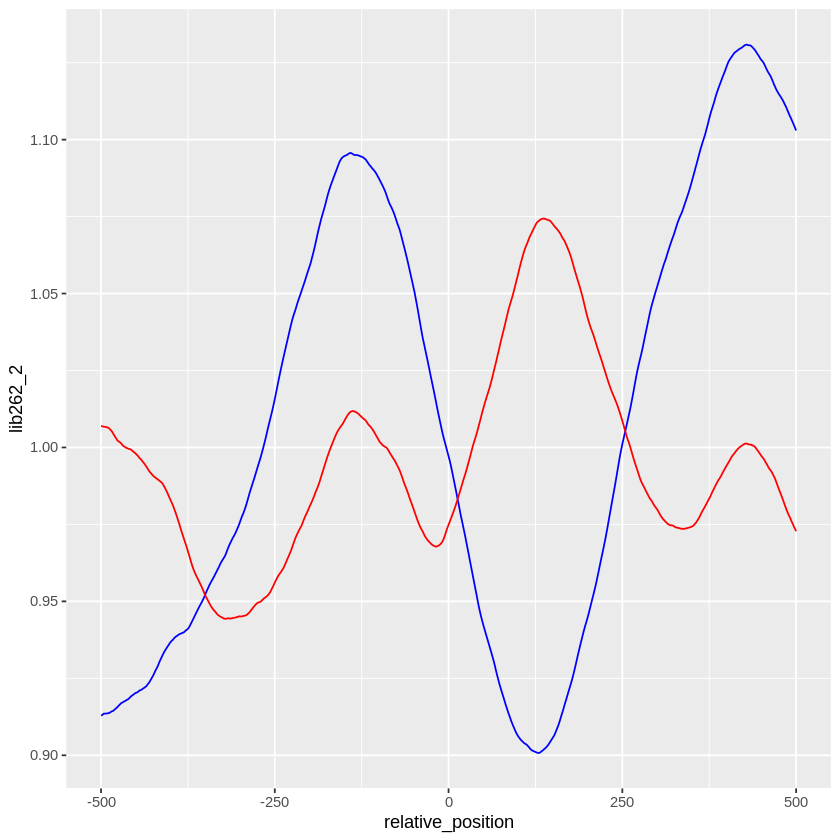

In [185]:
p

In [161]:
seq_num <- seq(from = -500, to = 500)
relative_position <- data.frame(Sequential_Numbers = seq_num)

In [ ]:
relative_position

In [ ]:

test <- data.frame(
  x = numeric(0)
)


nrows <- nrow(lib262_total)

for (i in 1:nrows) {
  row_i <- lib262_total[i, ]$"Relative_fraction_1"
  row_j <- lib262_total[i, ]$"Relative_fraction_2"


  data <- c(row_i,row_j)
  print(data)
  normalized_data <- (data - min(data)) / (max(data) - min(data))

  test <- rbind(test, normalized_data)

}

In [ ]:
test

In [ ]:
head(test_2)

,Sequential_Numbers,lib262_total$Relative_fraction_2
,<int>,<dbl>
1,-500,0.9226644
2,-499,0.9224743
3,-498,0.9223656
4,-497,0.9223249
5,-496,0.9222298
6,-495,0.9219582


In [ ]:
head(test)

,Sequential_Numbers,lib486_total$Relative_fraction_2
,<int>,<dbl>
1,-500,1.017676
2,-499,1.017689
3,-498,1.017582
4,-497,1.017489
5,-496,1.017382
6,-495,1.017315


In [ ]:
ggplot(test_2, aes(x = Sequential_Numbers, y = lib262_total$Relative_fraction_2)) + 
  geom_line() 

In [ ]:
ggplot(test, aes(x = Sequential_Numbers, y = lib486_total$Relative_fraction_2)) + 
  geom_line()  

In [ ]:
p = ggplot() + 
  geom_line(data = test_2, aes(x = Sequential_Numbers, y = lib262_total$Relative_fraction), color = "blue") +
  geom_line(data = test, aes(x = Sequential_Numbers, y = lib486_total$Relative_fraction), color = "red") 

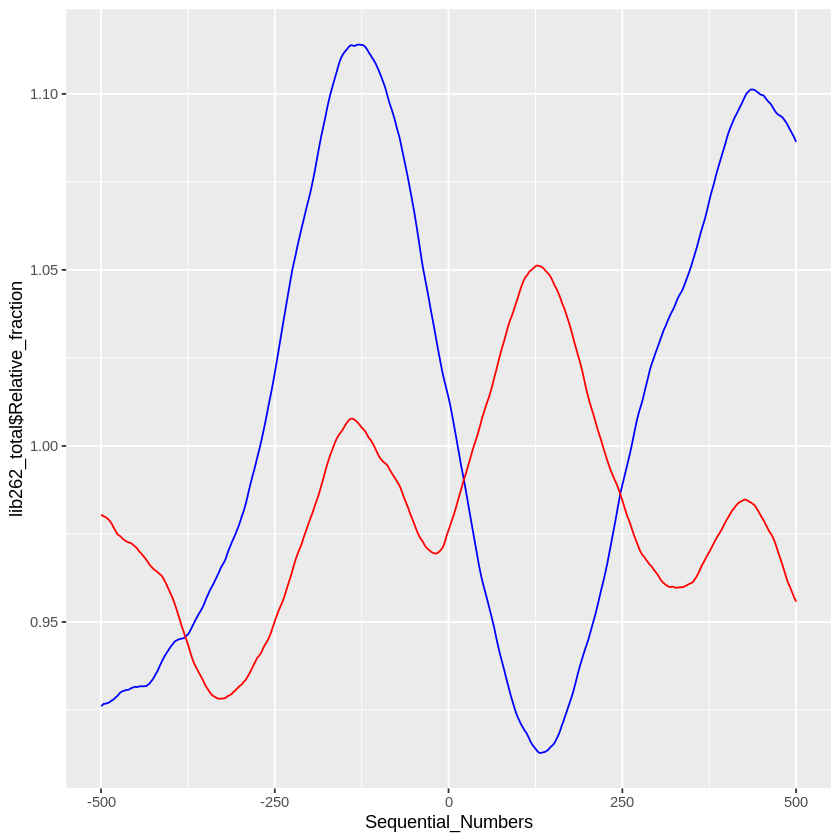

In [ ]:
p

In [ ]:
#######patient

In [ ]:
lib262_zi <- rollmean(lib262$count, k = 201)
lib262_zi <- data.frame(lib262_zi)

lib262_mu <- rollmean(lib262$count, k = 501)
lib262_mu <- data.frame(lib262_mu)

In [ ]:
lib262_mu$seq_num <- seq.int(nrow(lib262_mu))
lib262_zi$seq_num <- seq.int(nrow(lib262_zi))

In [ ]:
lib262_mu = lib262_mu %>% mutate(re_pos = seq_num -3251)
lib262_zi = lib262_zi %>% mutate(re_pos = seq_num -3401)

In [ ]:
row.names(lib262_mu) <- lib262_mu[,3]
row.names(lib262_zi) <- lib262_zi[,3]

In [ ]:
lib262_fenmu <- data.frame(
  x = numeric(0)
)

for (i in 1:1001) {
  # access the ith row of the dataframe
  row_i <- lib262_mu[i, ]
  row_j <- lib262_mu[i+5000,]
  row <- (row_i$lib262_mu + row_j$lib262_mu) / 2

  lib262_fenmu <- rbind(lib262_fenmu, c(row))
}


In [ ]:
lib262_fenzi <- data.frame(
  x = numeric(0)
)

for (i in 1:1001) {
  # access the ith row of the dataframe
  row_i <- lib262_zi[i+2900, ]$lib262_zi

  lib262_fenzi <- rbind(lib262_fenzi, c(row_i))
}

In [ ]:
head(lib262_fenmu)

,X356.295409181637
,<dbl>
1,356.2954
2,356.2894
3,356.2914
4,356.2944
5,356.3024
6,356.3054


In [ ]:

lib262_total <- cbind(lib262_fenzi,lib262_fenmu$X356.295409181637 )
colnames(lib262_total) <- c("Numerator", "Denominator")
lib262_total = lib262_total %>% mutate(Relative_fraction = Numerator/Denominator)

In [ ]:
lib262_total = lib262_total %>% mutate(Relative_fraction_version2 = Numerator/365.2236)

In [ ]:
lib486_total = lib486_total %>% mutate(Relative_fraction_version2 = Numerator/385.2226)

In [ ]:
lib486_total[501,]

,Numerator,Denominator,Relative_fraction
,<dbl>,<dbl>,<dbl>
501,363.8955,385.2226,0.9446371


In [ ]:
lib262_total[502,]

,Numerator,Denominator,Relative_fraction
,<dbl>,<dbl>,<dbl>
502,371.0547,365.2006,1.01603


In [ ]:
lib262_total[500,]

,Numerator,Denominator,Relative_fraction
,<dbl>,<dbl>,<dbl>
500,371.5622,365.2525,1.017275


In [ ]:
dim(lib262_total)

[1] 1001    3

In [ ]:
head(relative_position)

In [ ]:
seq_num <- seq(from = -500, to = 500)
relative_position <- data.frame(Sequential_Numbers = seq_num)
all_needed <- cbind(relative_position,lib262_total$Relative_fraction_version2, lib486_total$Relative_fraction_version2 )

In [ ]:
head(all_needed)

,Sequential_Numbers,lib262_total$Relative_fraction_version2,lib486_total$Relative_fraction_version2
,<int>,<dbl>,<dbl>
1,-500,0.9253923,0.9848799
2,-499,0.9252016,0.9848929
3,-498,0.9250927,0.9847895
4,-497,0.9250518,0.9846991
5,-496,0.9249564,0.9845958
6,-495,0.9246840,0.9845312


In [ ]:
ggplot(all_needed, aes(x = Sequential_Numbers, y = lib262_total$Relative_fraction)) + geom_line() + xlim(-500,500) + xlab("Position relative to peak") + ylab("Relative coverage") + 
  geom_smooth(method = "loess", span = .0125,)


In [ ]:
p = ggplot() + 
  geom_line(data = all_needed, aes(x = Sequential_Numbers, y = lib262_total$Relative_fraction_version2), color = "blue") +
  geom_line(data = all_needed, aes(x = Sequential_Numbers, y = lib486_total$Relative_fraction_version2), color = "red") 

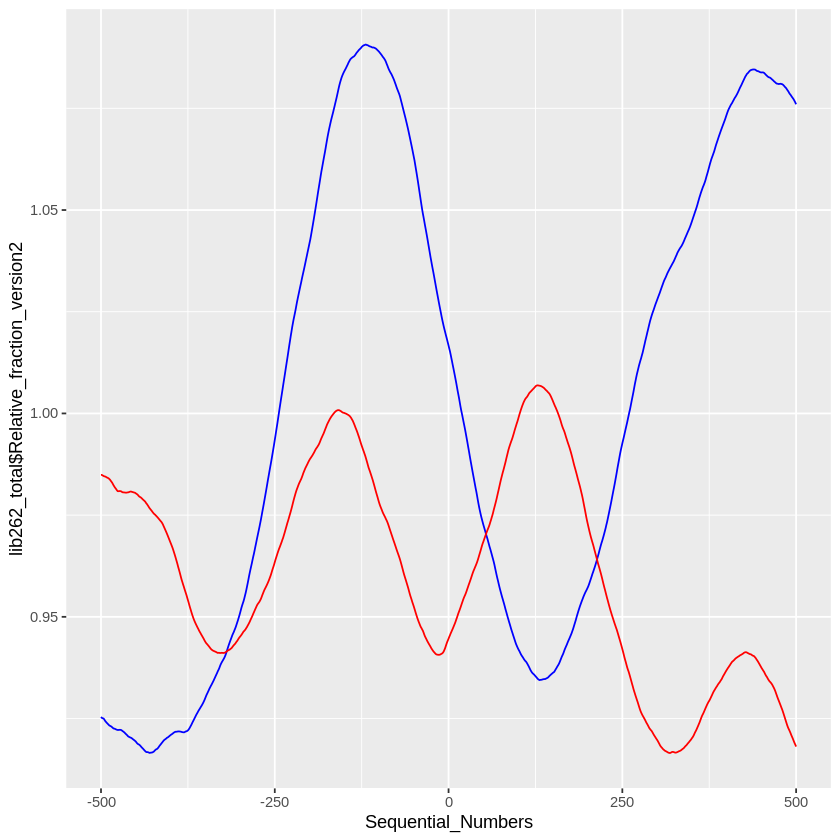

In [ ]:
p